In [28]:
import pandas as pd
import numpy as np
from ta.trend import EMAIndicator
from ta.momentum import RSIIndicator


In [51]:
# File paths
file1 = r"C:\Users\win10\OneDrive\Desktop\New folder\assignment\CSV.csv"
file2 = r"C:\Users\win10\OneDrive\Desktop\New folder\assignment\MSFT.csv"
file3 = r"C:\Users\win10\OneDrive\Desktop\New folder\assignment\TSLA.csv"

# Load CSV files into DataFrames
df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)
df3 = pd.read_csv(file3)

# df1.head()
# df2.head()
# df3.head()
# Add a column to identify the stock symbol
df1['Stock'] = 'CSV'
df2['Stock'] = 'MSFT'
df3['Stock'] = 'TSLA'

# Combine all DataFrames into one
data = pd.concat([df1, df2, df3], ignore_index=True)

# Display the first few rows
print(data.head())


         Date   Open   High    Low  Close   Volume Stock
0  01/17/2025  40.00  40.50  39.77  40.12   99,226   CSV
1  01/16/2025  39.90  40.34  39.67  39.83   69,562   CSV
2  01/15/2025  40.05  40.38  39.75  40.08  150,918   CSV
3  01/14/2025  39.57  40.07  39.25  39.68   94,930   CSV
4  01/13/2025  38.26  39.22  38.17  39.18   61,550   CSV


In [52]:
# Check for missing values
print(data.isnull().sum())

# # Drop rows with missing values (if any)
# data = data.dropna()

# # Ensure the required columns exist (e.g., 'Close', 'Date')
# print(data.columns)


Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Stock     0
dtype: int64


In [54]:
data.shape

(284, 7)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    284 non-null    object 
 1   Open    284 non-null    float64
 2   High    284 non-null    float64
 3   Low     284 non-null    float64
 4   Close   284 non-null    float64
 5   Volume  284 non-null    object 
 6   Stock   284 non-null    object 
dtypes: float64(4), object(3)
memory usage: 15.7+ KB


In [56]:
data.describe()

,Open,High,Low,Close
count,284.000000,284.000000,284.000000,284.000000
mean,77.336021,78.437218,76.020246,77.219225
std,127.339644,129.211490,124.821136,126.987952
min,23.120000,23.660000,22.960000,23.120000
25%,26.290000,26.612500,25.877500,26.302500
50%,30.855000,31.260000,30.615000,30.965000
75%,39.240000,39.565000,38.525000,39.187500
max,465.160000,465.330000,451.020000,462.280000


In [61]:
# Ensure 'Close' column is float
data['Close'] = data['Close'].astype(float)

# Calculate EMA and RSI
data['EMA_10'] = EMAIndicator(close=data['Close'], window=10).ema_indicator()
data['EMA_20'] = EMAIndicator(close=data['Close'], window=20).ema_indicator()
data['RSI'] = RSIIndicator(close=data['Close'], window=14).rsi()

# Display the first few rows with new columns
print(data[['Date', 'Stock', 'Close', 'EMA_10', 'EMA_20', 'RSI']].head())


         Date Stock  Close  EMA_10  EMA_20  RSI
0  01/17/2025   CSV  40.12     NaN     NaN  NaN
1  01/16/2025   CSV  39.83     NaN     NaN  NaN
2  01/15/2025   CSV  40.08     NaN     NaN  NaN
3  01/14/2025   CSV  39.68     NaN     NaN  NaN
4  01/13/2025   CSV  39.18     NaN     NaN  NaN


In [62]:
print(len(data))

284


In [66]:
# Initialize signal columns
data['Buy_Signal'] = np.nan
data['Sell_Signal'] = np.nan

# Generate signals
for i in range(1, len(data)):
    if data['EMA_10'][i] > data['EMA_20'][i] and data['RSI'][i] < 30:
        data.at[i, 'Buy_Signal'] = data['Close'][i]
    elif data['EMA_10'][i] < data['EMA_20'][i] and data['RSI'][i] > 70:
        data.at[i, 'Sell_Signal'] = data['Close'][i]

# Display the last few rows
print(data[['Date', 'Stock', 'Close', 'EMA_10', 'EMA_20', 'RSI', 'Buy_Signal', 'Sell_Signal']].tail())


           Date Stock   Close      EMA_10      EMA_20        RSI  Buy_Signal  \
279  12/30/2024  TSLA  417.41  404.927608  390.758790  64.150567         NaN   
280  12/27/2024  TSLA  431.66  409.788043  394.654144  66.945586         NaN   
281  12/26/2024  TSLA  454.13  417.850217  400.318511  70.810204         NaN   
282  12/24/2024  TSLA  462.28  425.928359  406.219605  72.085037         NaN   
283  12/23/2024  TSLA  430.60  426.777748  408.541548  60.943135         NaN   

     Sell_Signal  
279          NaN  
280          NaN  
281          NaN  
282          NaN  
283          NaN  


In [64]:
data.head()

,Date,Open,High,Low,Close,Volume,Stock,EMA_10,EMA_20,RSI,Buy_Signal,Sell_Signal
0,01/17/2025,40.00,40.50,39.77,40.12,"99,226",CSV,NaN,NaN,NaN,NaN,NaN
1,01/16/2025,39.90,40.34,39.67,39.83,"69,562",CSV,NaN,NaN,NaN,NaN,NaN
2,01/15/2025,40.05,40.38,39.75,40.08,"150,918",CSV,NaN,NaN,NaN,NaN,NaN
3,01/14/2025,39.57,40.07,39.25,39.68,"94,930",CSV,NaN,NaN,NaN,NaN,NaN
4,01/13/2025,38.26,39.22,38.17,39.18,"61,550",CSV,NaN,NaN,NaN,NaN,NaN


In [69]:
output_path = r"C:\Users\win10\OneDrive\Desktop\New folder\assignment\processed_data.csv"
data.to_csv(output_path, index=False)

print(f"Processed data saved to {output_path}")


Processed data saved to C:\Users\win10\OneDrive\Desktop\New folder\assignment\processed_data.csv


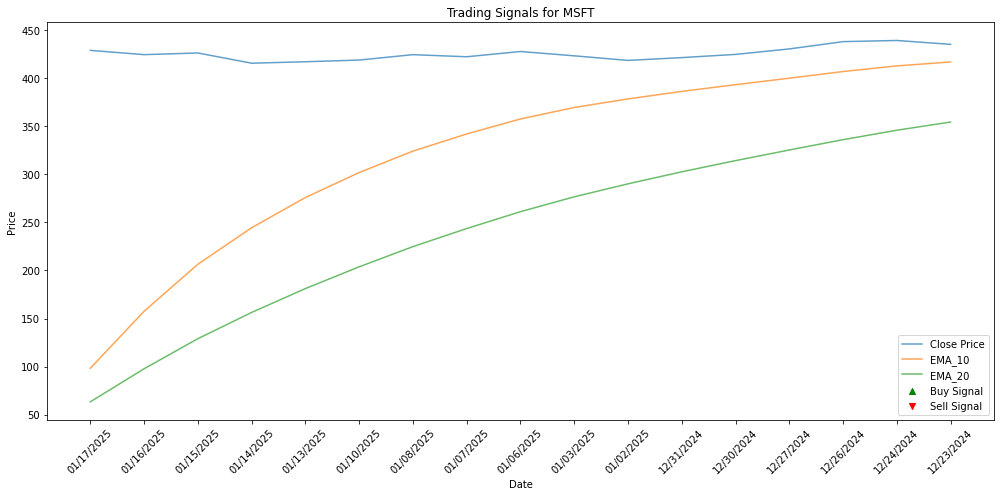

In [73]:
import matplotlib.pyplot as plt

# Filter data for a specific stock (e.g., 'MSFT')
stock_data = data[data['Stock'] == 'MSFT']

# Plot the closing price, EMA, and signals
plt.figure(figsize=(14, 7))
plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price', alpha=0.7)
plt.plot(stock_data['Date'], stock_data['EMA_10'], label='EMA_10', alpha=0.7)
plt.plot(stock_data['Date'], stock_data['EMA_20'], label='EMA_20', alpha=0.7)

# Plot buy and sell signals
plt.scatter(stock_data['Date'], stock_data['Buy_Signal'], label='Buy Signal', marker='^', color='green', alpha=1)
plt.scatter(stock_data['Date'], stock_data['Sell_Signal'], label='Sell Signal', marker='v', color='red', alpha=1)

# Add labels and legend
plt.title('Trading Signals for MSFT')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
